1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2. Load the Dataset

In [2]:
df = pd.read_csv('Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


3. Data Preprocessing

In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
df.duplicated().any()

False

In [8]:
# Dropping  Row ID column and assigning to df
df = df.drop("Row ID", axis = 1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df["Country"].value_counts()

,count
Country,
United States,9994


In [10]:
# Droping Country Column
df = df.drop("Country", axis = 1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Convert Date columns into datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors= "coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors= "coerce")
df.dtypes

,0
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object
Postal Code,int64


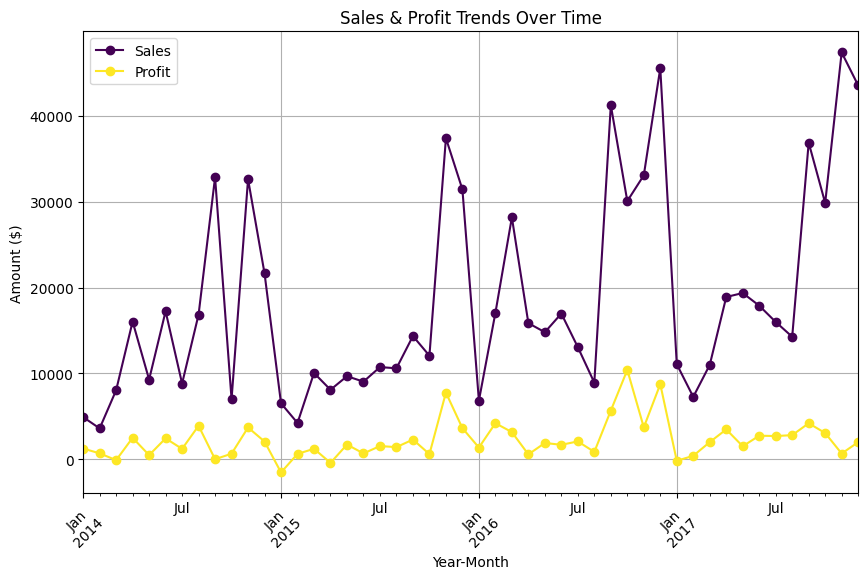

In [12]:
# Sales & Profit Trends Over Time
df["Year-Month"] = df["Order Date"].dt.to_period("M")

# Group by Year-Month for trend analysis
time_trend = df.groupby("Year-Month")[["Sales", "Profit"]].sum()

# Plot sales and profit trends over time
fig, ax = plt.subplots(figsize=(10, 6))
time_trend.plot(ax=ax, marker="o", linestyle="-", colormap="viridis")
ax.set_title("Sales & Profit Trends Over Time")
ax.set_ylabel("Amount ($)")
ax.set_xlabel("Year-Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [13]:
# Total Categories
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
# Count of category
df['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


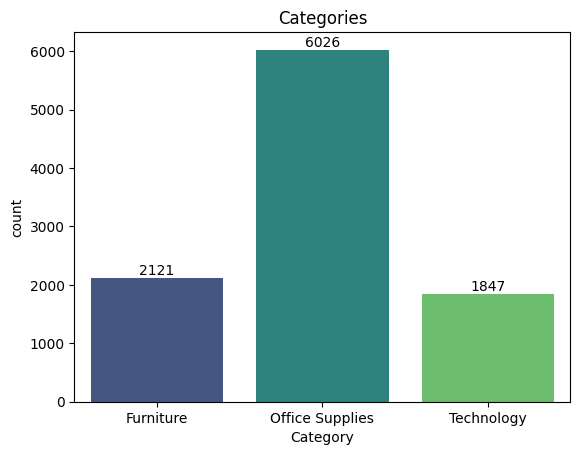

In [15]:
# Categories plot
tc = sns.countplot(x = "Category", data = df, palette = "viridis")
for bar in tc.containers:
  tc.bar_label(bar)
plt.title("Categories")
plt.show()


In [16]:
# Total Sub-Categories
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [17]:
# Count of Sub-Categories
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


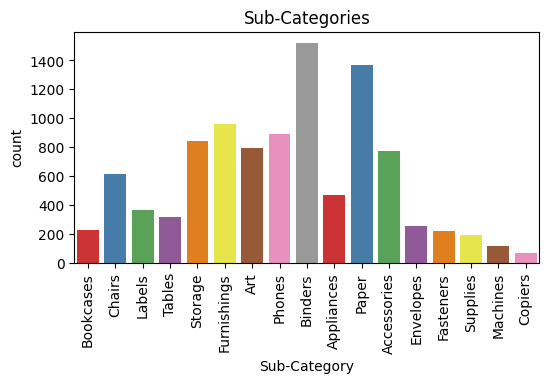

In [18]:
# Sub-Categories Plot
plt.figure(figsize=(6, 3))
sc = sns.countplot(x = "Sub-Category", data = df, palette = "Set1")
plt.title("Sub-Categories")
plt.xticks(rotation=90)
plt.show()


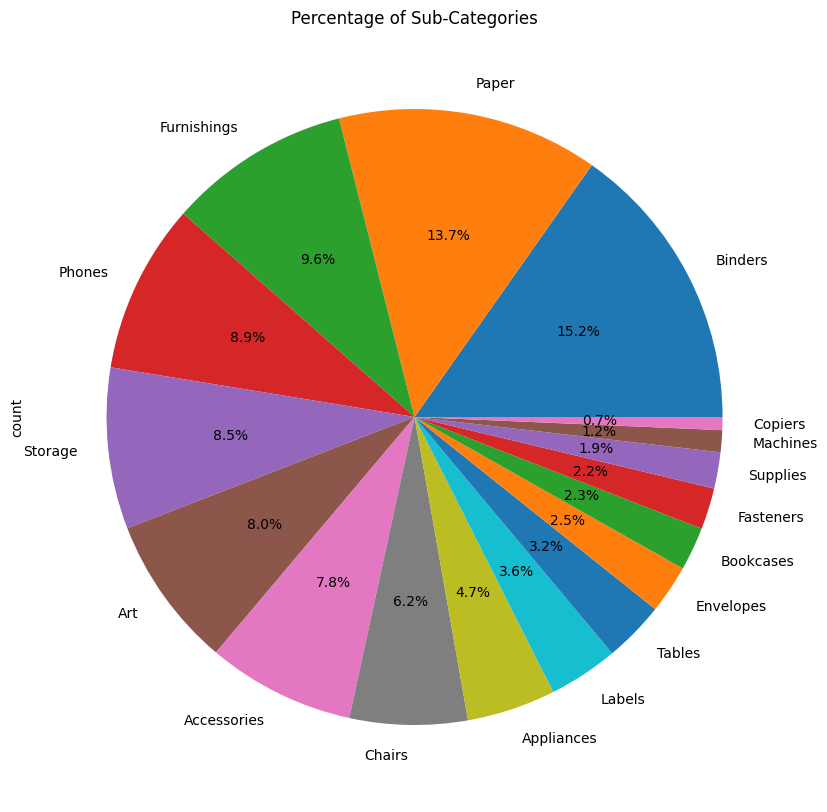

In [19]:
#pie plot to understand the percentage of products
plt.figure(figsize=(10, 10))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage of Sub-Categories")
plt.show()

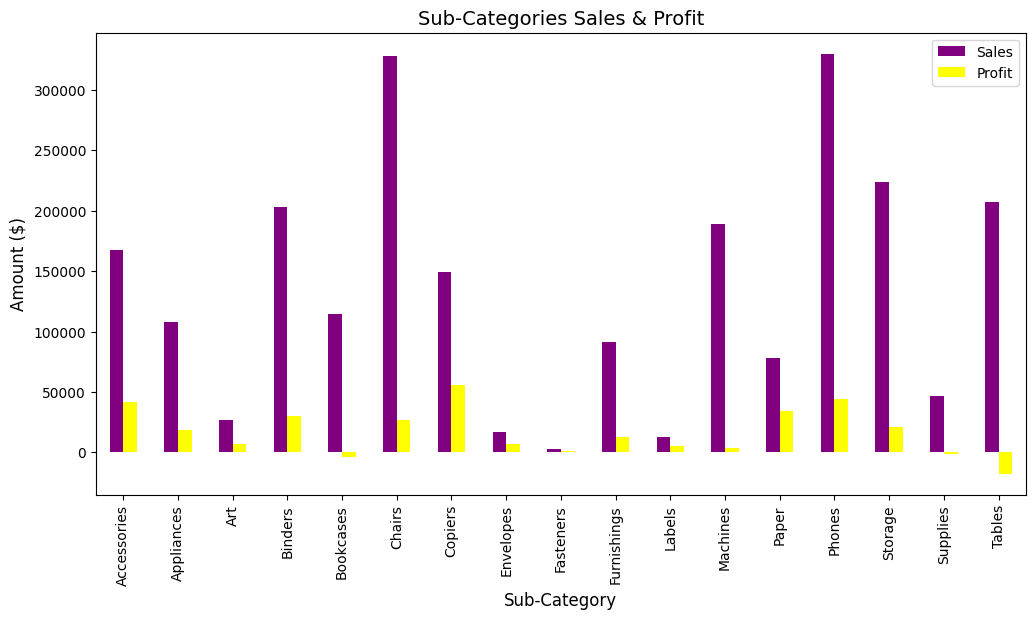

In [20]:
#Sub-Categories sales and profit
sp = df.groupby("Sub-Category")[["Sales", "Profit"]].agg(["sum"]).plot.bar(color=["purple", "yellow"], figsize=(12, 6))
plt.title("Sub-Categories Sales & Profit")
plt.title("Sub-Categories Sales & Profit", fontsize=14)
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Amount ($)", fontsize=12)
plt.legend(["Sales", "Profit"], loc="upper right")
plt.show()

In [21]:
#Number of prodcuts in store
df['Product Name'].nunique()

1850

In [22]:
#Products
df["Product Name"].value_counts()

,count
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Boston 1900 Electric Pencil Sharpener,1
RCA ViSYS 25423RE1 Corded phone,1
"Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner",1


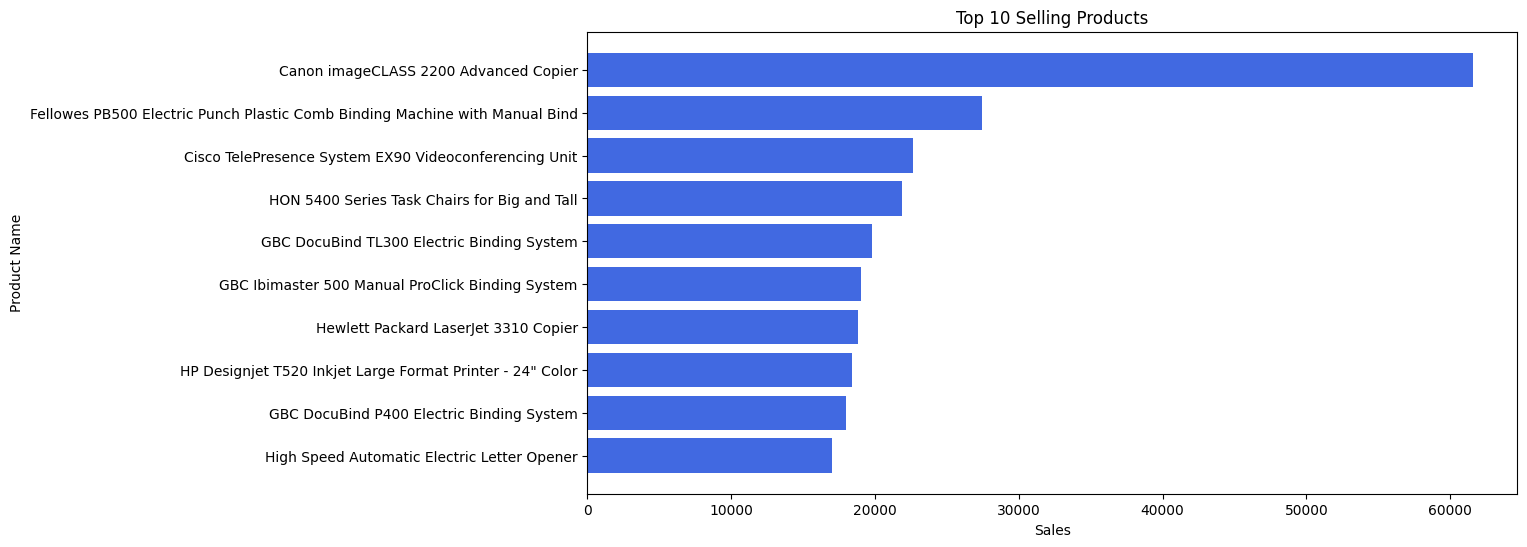

In [23]:
#Distribution of top 10 products by sales
top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10)
#ploting the data
plt.figure(figsize=(12,6))
plt.barh(top_selling_products.index, top_selling_products.values, color = 'royalblue')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products')
plt.gca().invert_yaxis()
plt.show()

<Figure size 1100x600 with 0 Axes>

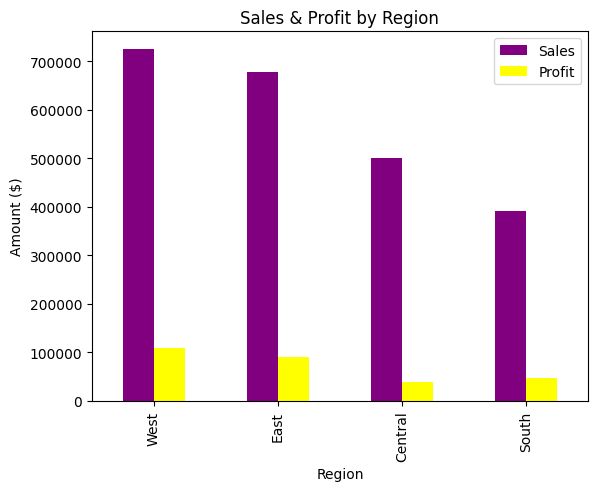

In [24]:
#Region wise sales and profit
region_sales_profit = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
#plot the data
plt.figure(figsize=(11, 6))

# Create a bar chart for Sales & Profit by Region
rs = region_sales_profit.plot(kind="bar", color=["Purple", "Yellow"])
plt.title("Sales & Profit by Region")
plt.xlabel("Region")
plt.ylabel("Amount ($)")
plt.show()

In [25]:
#Creating Cost Column
df["Cost"] = df["Sales"] - df["Profit"]
df['Cost'].head()

,Cost
0,220.0464
1,512.3580
2,7.7486
3,1340.6085
4,19.8516


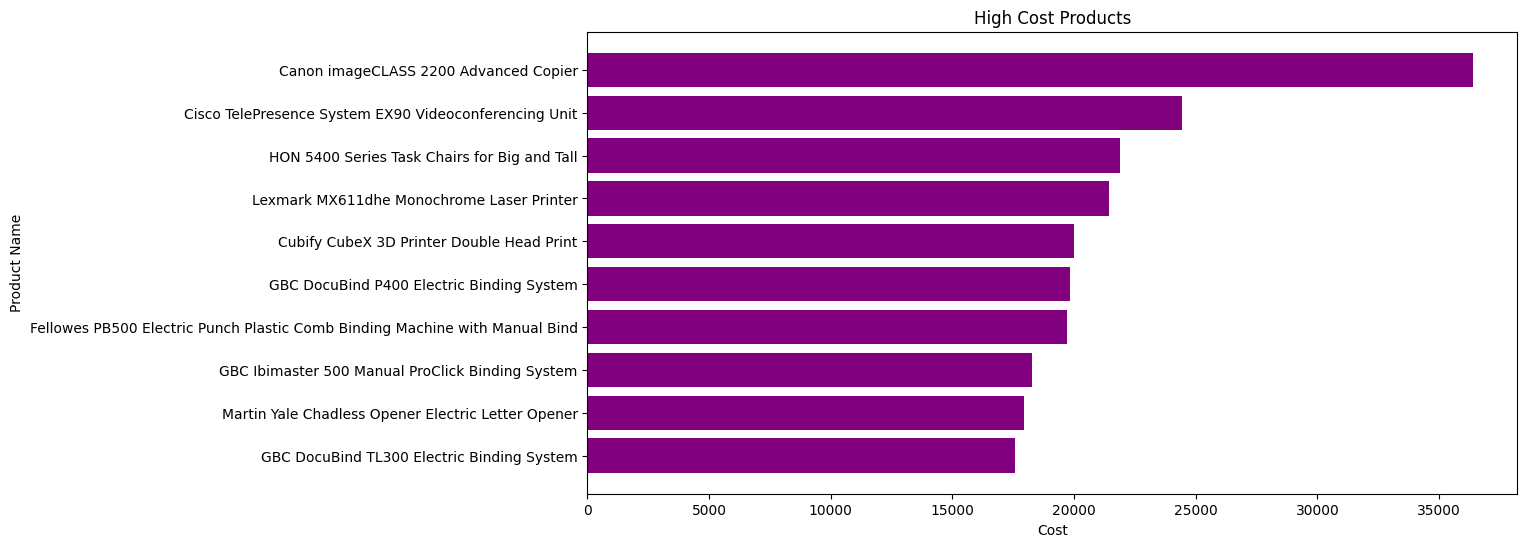

In [26]:
#High cost products
high_cost_products = df.groupby("Product Name")["Cost"].sum().sort_values(ascending = False).head(10)

#plot the output
plt.figure(figsize=(12,6))
plt.barh(high_cost_products.index, high_cost_products.values, color="Purple")
plt.xlabel('Cost')
plt.ylabel('Product Name')
plt.title('High Cost Products')
plt.gca().invert_yaxis()
plt.show()


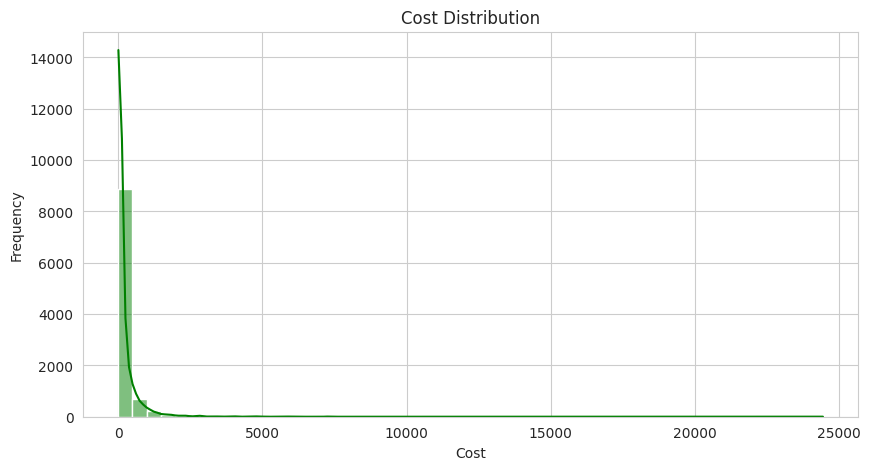

In [27]:
#Cost Distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(df["Cost"], bins = 50, kde = True, color = "green")
plt.title("Cost Distribution")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

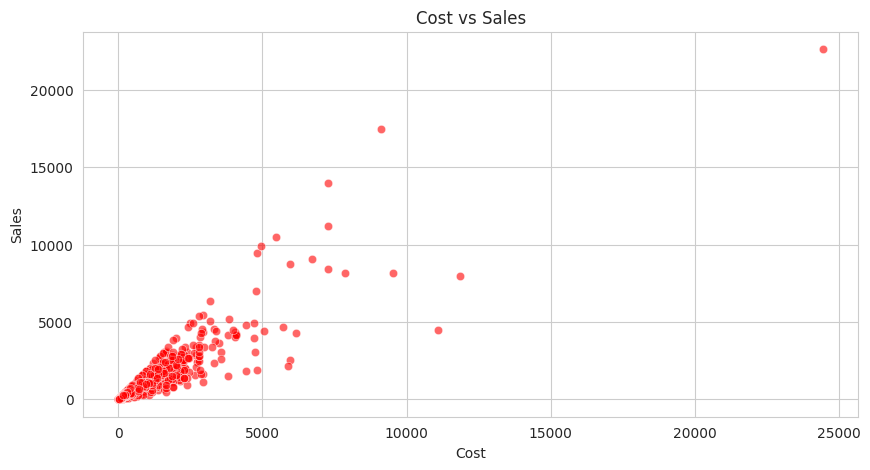

In [28]:
#Cost vs Sales

plt.figure(figsize=(10,5))
sns.scatterplot(x = df["Cost"], y = df["Sales"], data = df, color = "Red", alpha = 0.6)
plt.title("Cost vs Sales")
plt.xlabel("Cost")
plt.ylabel("Sales")
plt.show()

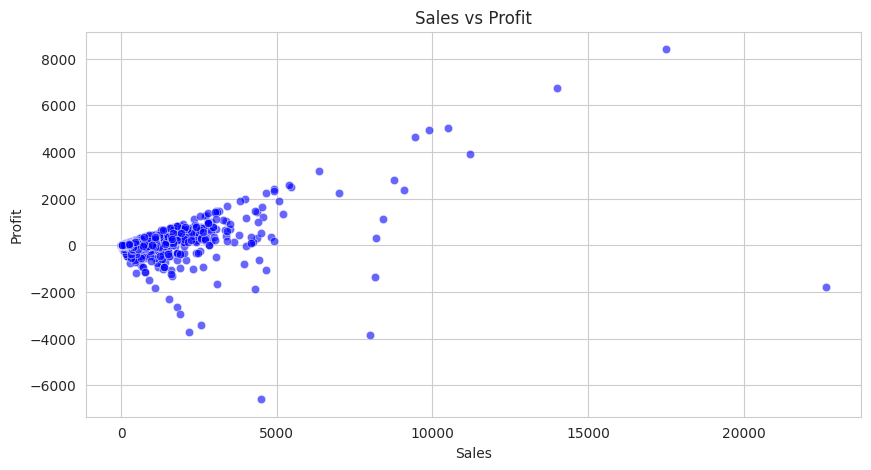

In [29]:
#Sales vs Profit
plt.figure(figsize=(10,5))
sns.scatterplot(x = df["Sales"], y = df["Profit"], data = df, color = "Blue", alpha = 0.6)
plt.title("Sales vs Profit")
plt.show()

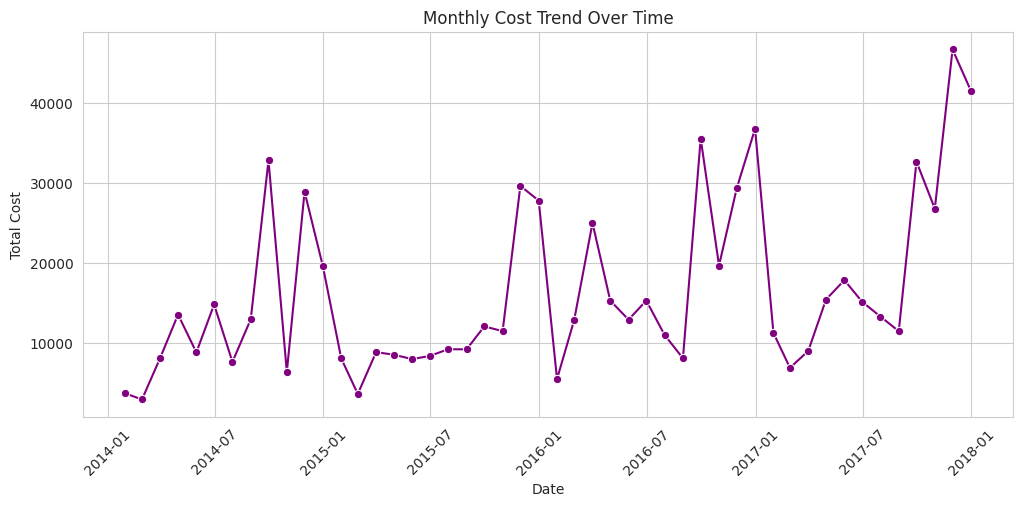

In [30]:
#Creating Cost_trend column
Cost_trend = df.resample("M", on = "Order Date")["Cost"].sum()

#ploting the trend
plt.figure(figsize=(12, 5))
sns.lineplot(x = Cost_trend.index, y = Cost_trend.values, marker="o", color="purple")
plt.title("Monthly Cost Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cost")
plt.xticks(rotation=45)
plt.show()


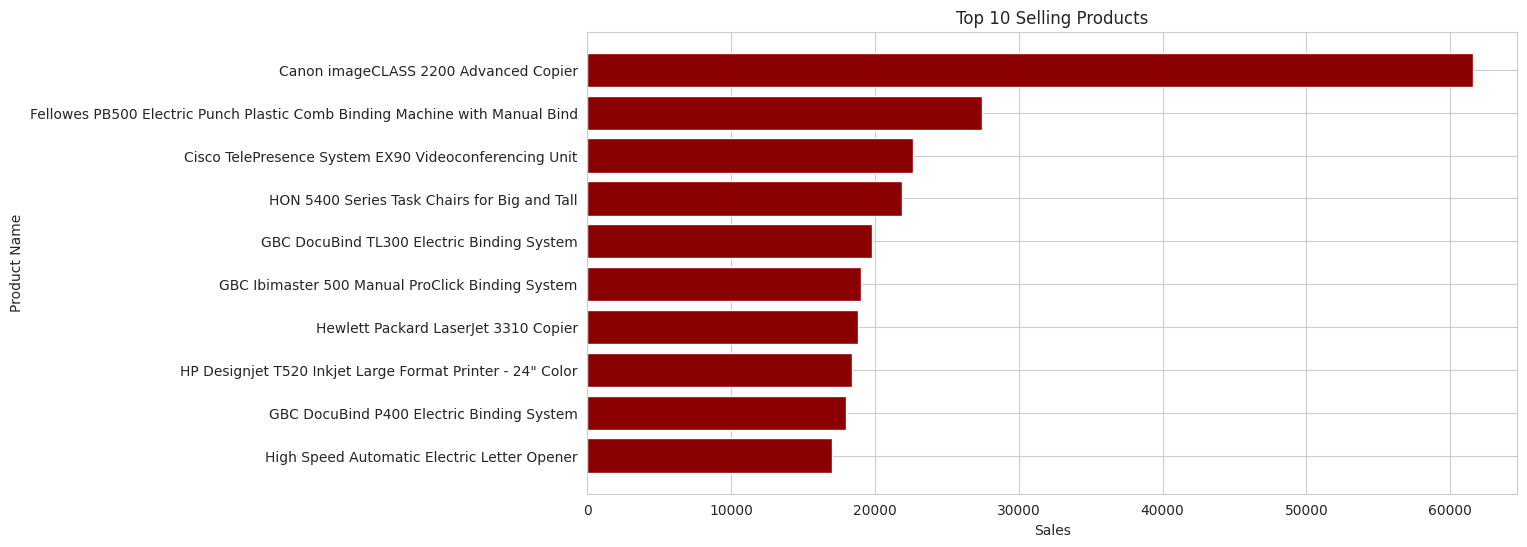

In [31]:
#Distribution of top 10 products by sales
top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10)
#ploting the output
plt.figure(figsize=(12,6))
plt.barh(top_selling_products.index, top_selling_products.values, color = 'darkred')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products')
plt.gca().invert_yaxis()
plt.show()

In [32]:
#Profit of the store
df["Profit"].sum()

286397.0217

In [33]:
#Creating profit margin(%)  column
df['Profit %'] = (df['Profit']/df['Sales'])*100
df['Profit %'].head()

,Profit %
0,16.00
1,30.00
2,47.00
3,-40.00
4,11.25


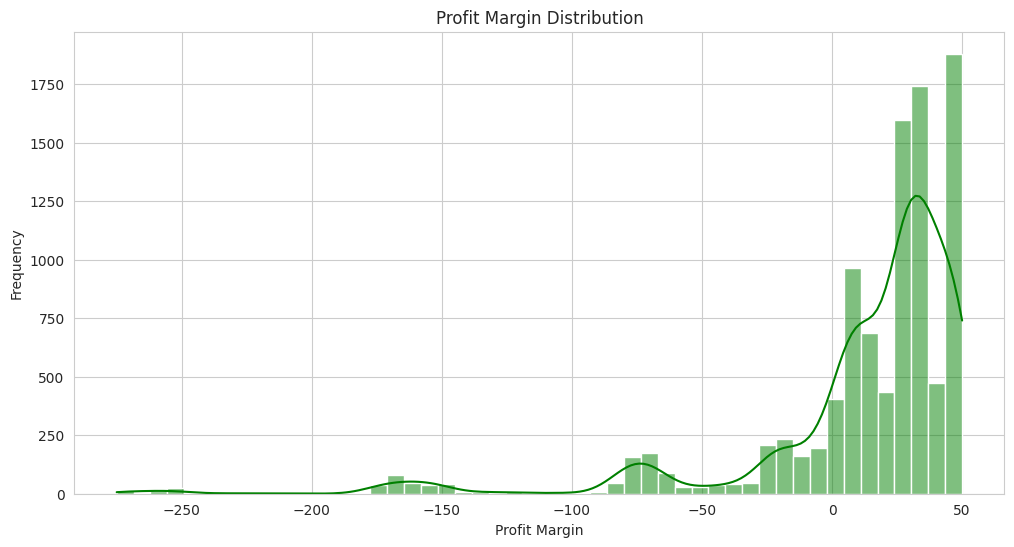

In [34]:
#Profit Margin Distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
sns.histplot(df["Profit %"], bins = 50, kde = True, color = "green")
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()


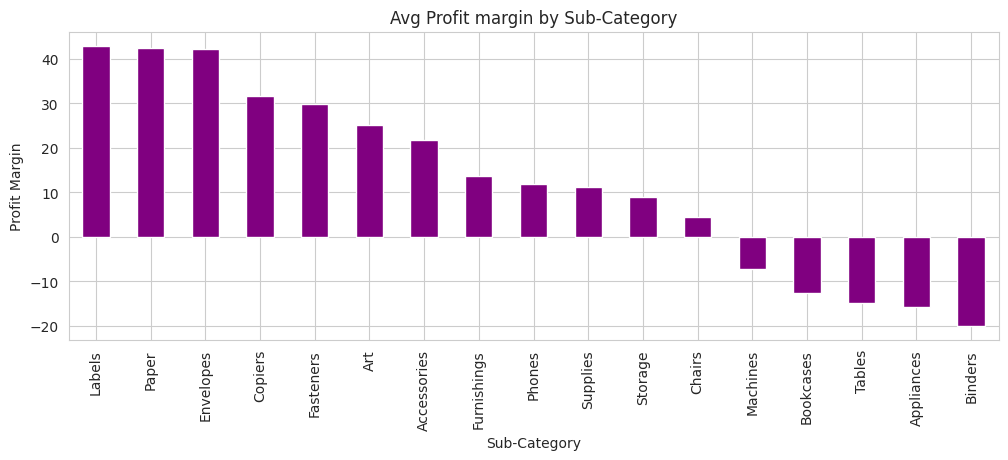

In [35]:
#Average profit margin by sub - categories
avg_profit = df.groupby("Sub-Category")["Profit %"].mean().sort_values(ascending = False)

#plot the output
plt.figure(figsize=(12,4))
avg_profit.plot(kind = "bar", color = "Purple")
plt.title("Avg Profit margin by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit Margin")
plt.show()

In [36]:
#Products with high profit percentage
high_profit_products = df.groupby("Product Name")["Profit %"].mean().sort_values(ascending = False).head(10)
high_profit_products

,Profit %
Product Name,
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,50.0
Avery 475,50.0
Southworth Structures Collection,50.0
"Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book",50.0
Tops Green Bar Computer Printout Paper,50.0
Xerox 1890,50.0
Avery 5,49.0
Xerox 1918,49.0
Color-Coded Legal Exhibit Labels,49.0


In [37]:
#Most frequent buyer
top_buyer = df["Customer Name"].value_counts().head(10)
top_buyer

,count
Customer Name,
William Brown,37
John Lee,34
Matt Abelman,34
Paul Prost,34
Chloris Kastensmidt,32
Seth Vernon,32
Jonathan Doherty,32
Edward Hooks,32
Zuschuss Carroll,31


In [38]:
#Customer Segmentation
df["Segment"].value_counts()

,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


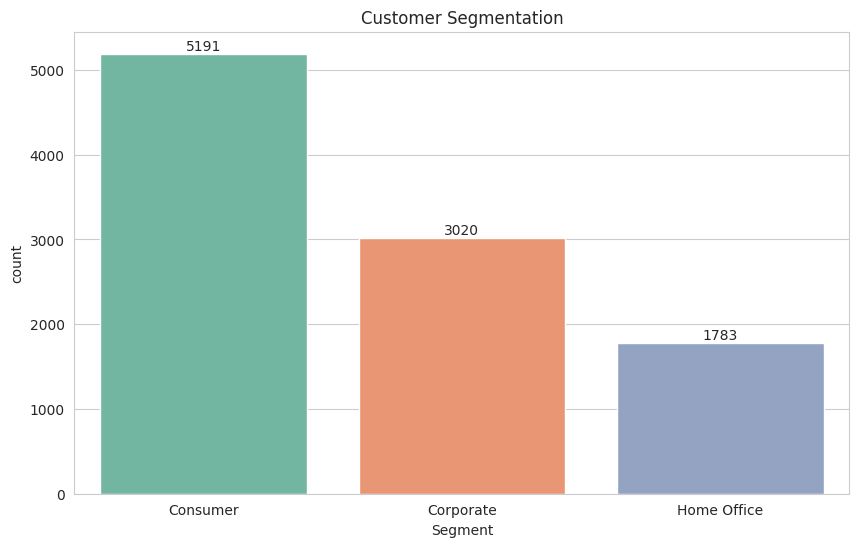

In [39]:
#Visualizing the segment
plt.figure(figsize = (10,6))
s = sns.countplot(x = "Segment", data = df, palette = "Set2")
plt.title("Customer Segmentation")
for bar in s.containers:
  s.bar_label(bar)
plt.show()

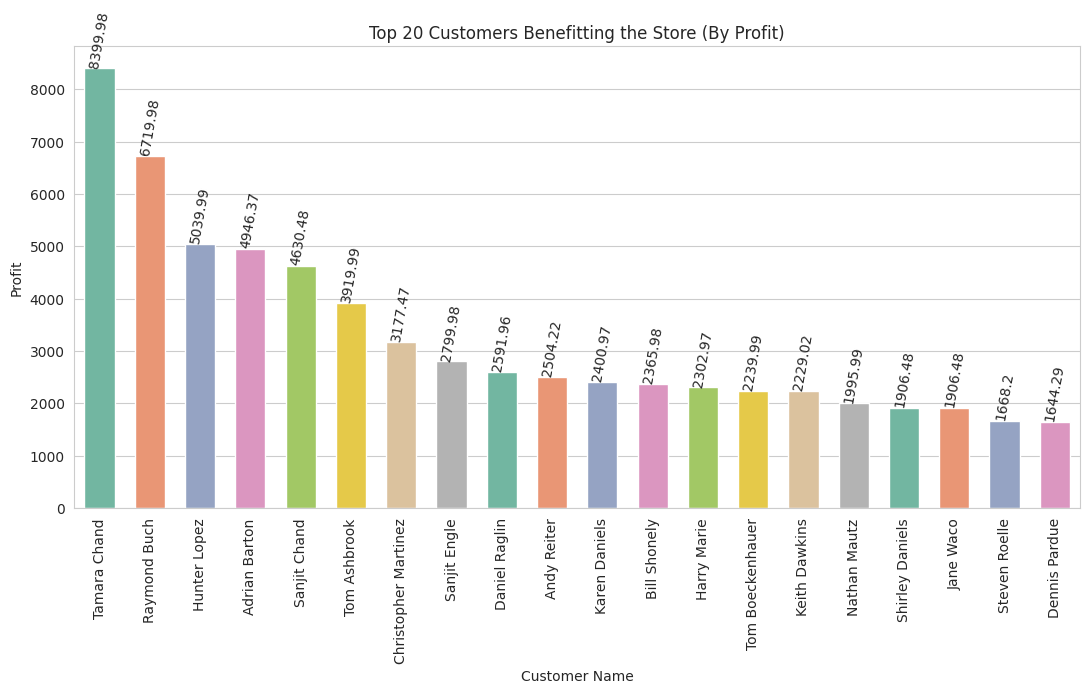

In [40]:
# Top 20 customers who benefited the store the most (highest profit contribution)
top_customers_profit = df.sort_values(['Profit'], ascending=False).head(20)

#plot the data
plt.figure(figsize = (11,7))
cp = sns.barplot(x = "Customer Name", y = "Profit", data = top_customers_profit, palette = "Set2",width= 0.6)
plt.title("Top 20 Customers Benefitting the Store (By Profit)")
for bar in cp.containers:
  cp.bar_label(bar, rotation = 80)
plt.xlabel("Customer Name")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
#High profit region
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


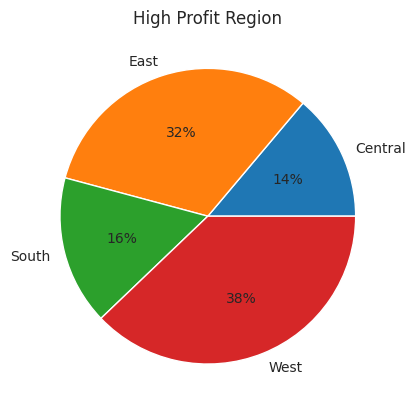

In [42]:
#plot the data
plt.pie(region_analysis['Profit'], labels = region_analysis['Region'], autopct = '%1.0f%%')
plt.title("High Profit Region")
plt.show()